In [1]:
#Import useful functions
import warnings
import statistics
warnings.filterwarnings("ignore")
from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix as cm
from sklearn.utils.multiclass import unique_labels
import itertools
from scipy import misc
import math
import os
import glob
import xlrd
import xlwt
import pandas as pd
from pandas import ExcelWriter
from pandas import ExcelFile
from PIL import Image
from statsmodels.tsa.statespace.sarimax import SARIMAX
import statsmodels.api as sm
import pylab as plt
import numpy as np
from scipy.signal import argrelextrema
from IPython.display import Image
import matplotlib.patches as patches
import matplotlib as matplotlib
import xlsxwriter
from xlrd import open_workbook
from xlutils.copy import copy
from sklearn.model_selection import train_test_split
from datetime import datetime
plt.style.use('fivethirtyeight')
import itertools
from fbprophet import Prophet
from scipy.interpolate import interp1d
from sklearn.preprocessing import StandardScaler
import xlrd

In [2]:
filename='/Users/JoyThompson/Desktop/scdammitdollskulevel.xlsx'
sheetname='Sheet1'
skuorder=pd.read_excel(filename, sheet_name=sheetname)

In [3]:
#Select Arima Test Model Parameters
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

In [4]:
#Create List of Dates
datesall=['2018-01-31','2018-02-28','2018-03-31','2018-04-30',
         '2018-05-31','2018-06-30','2018-07-31','2018-08-31','2018-09-30','2018-10-31','2018-11-30','2018-12-31','2019-01-31','2019-02-28','2019-03-31','2019-04-30',
         '2019-05-31','2019-06-30','2019-07-31','2019-08-31','2019-09-30','2019-10-31','2019-11-30','2019-12-31',
         '2020-01-31','2020-02-29','2020-03-31','2020-04-30','2020-05-31','2020-06-30','2020-07-31',
         '2020-08-31','2020-09-30','2020-10-31','2020-11-30','2020-12-31','2021-01-31', '2021-02-28', '2021-03-31']
#Convert Dates to Datetime Format
datestopd=[]
for column in datesall:
        date=pd.to_datetime(column)
        datestopd.append(date)
datesinput=datestopd[4:27]
datesout=datestopd[-13:]

In [5]:
def arimamodel(forecastin):
    from statsmodels.tsa.statespace.sarimax import SARIMAX
    import statsmodels.api as sm
    aicnum=[]
    param1=[]
    param2=[]
    for param in pdq:
        for param_seasonal in seasonal_pdq:
            try:
                results = sm.tsa.statespace.SARIMAX(forecastin,order=param,seasonal_order=param_seasonal, freq='M')
                results=results.fit(forecastin)
               
                param1.append(param)
                param2.append(param_seasonal)
                aicnum.append(results.aic)
            except:
                continue
    minpos = aicnum.index(min(aicnum)) 
    ordervar=param1[minpos]
    seasonalvar=param2[minpos]
    return ordervar, seasonalvar

In [6]:
for ind in skuorder.index:
    sku=skuorder.loc[ind, 'sku']
    skuorder.loc[ind ,'sku']=str(sku)

['WDS126' 7 10 5 9.3 20.35714285714286 8.857142857142858 24.0
 33.81818181818181 8.0 20 30.0 15 14.0 11 5 9 7 20.66666666666666 18 69 13
 7.724137931034482 9.0]
[69.0 13.0 7.72 9.0]
[[-0.68354123]
 [-0.46286868]
 [-0.83065627]
 [-0.51435894]
 [ 0.29918721]
 [-0.54672425]
 [ 0.56693658]
 [ 1.2892714 ]
 [-0.60998371]
 [ 0.2727065 ]
 [ 1.00828169]
 [-0.09508109]
 [-0.16863861]
 [-0.38931116]
 [-0.83065627]
 [-0.5364262 ]
 [-0.68354123]
 [ 0.32199004]
 [ 0.12559147]
 [ 3.87702489]
 [-0.24219612]
 [-0.63057982]
 [-0.5364262 ]]
0      7.00
1     10.00
2      5.00
3      9.30
4     20.36
5      8.86
6     24.00
7     33.82
8      8.00
9     20.00
10    30.00
11    15.00
12    14.00
13    11.00
14     5.00
15     9.00
16     7.00
17    20.67
18    18.00
19    69.00
20    13.00
21     7.72
22     9.00
Name: y, dtype: float64
[-0.68354123 -0.46286868 -0.83065627 -0.51435894  0.29918721 -0.54672425
  0.56693658  1.2892714  -0.60998371  0.2727065   1.00828169 -0.09508109
 -0.16863861 -0.38931116 -

C:\Users\JoyThompson\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\Users\JoyThompson\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



C:\Users\JoyThompson\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\Users\JoyThompson\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



C:\Users\JoyThompson\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\Users\JoyThompson\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



C:\Users\JoyThompson\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



C:\Users\JoyThompson\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



C:\Users\JoyThompson\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\Users\JoyThompson\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



C:\Users\JoyThompson\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



C:\Users\JoyThompson\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



C:\Users\JoyThompson\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\Users\JoyThompson\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



C:\Users\JoyThompson\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\Users\JoyThompson\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



C:\Users\JoyThompson\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



C:\Users\JoyThompson\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



C:\Users\JoyThompson\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



C:\Users\JoyThompson\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



C:\Users\JoyThompson\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\Users\JoyThompson\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



C:\Users\JoyThompson\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



C:\Users\JoyThompson\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



C:\Users\JoyThompson\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



C:\Users\JoyThompson\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



C:\Users\JoyThompson\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



        index    0
0  2020-04-30  0.0
1  2020-05-31  0.0
2  2020-06-30  0.0
3  2020-07-31  0.0
4  2020-08-31  0.0
5  2020-09-30  0.0
6  2020-10-31  0.0
7  2020-11-30  0.0
8  2020-12-31  0.0
9  2021-01-31  0.0
10 2021-02-28  0.0
11 2021-03-31  0.0
        index    0
0  2020-04-30  0.0
1  2020-05-31  0.0
2  2020-06-30  0.0
3  2020-07-31  0.0
4  2020-08-31  0.0
5  2020-09-30  0.0
6  2020-10-31  0.0
7  2020-11-30  0.0
8  2020-12-31  0.0
9  2021-01-31  0.0
10 2021-02-28  0.0
11 2021-03-31  0.0
['WDS127' 4 5 2 4.0 5.0 2.0 24.0 33.81818181818181 8.0 5 nan 4 6.0 3 5 13
 12 14.0 19 83 13 3.862068965517241 4.0]
[83.0 13.0 3.86 4.0]
[[-0.4952929 ]
 [-0.43586189]
 [-0.43586189]
 [-0.4952929 ]
 [-0.43586189]
 [-0.43586189]
 [ 0.69332738]
 [ 1.27693993]
 [-0.25756885]
 [-0.43586189]
 [-0.43586189]
 [-0.4952929 ]
 [-0.37643087]
 [-0.55472392]
 [-0.43586189]
 [ 0.03958622]
 [-0.01984479]
 [ 0.09901724]
 [ 0.39617231]
 [ 4.1997572 ]
 [ 0.03958622]
 [-0.50361324]
 [-0.4952929 ]]
0      4.00
1      5.00


C:\Users\JoyThompson\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\Users\JoyThompson\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



C:\Users\JoyThompson\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



C:\Users\JoyThompson\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



C:\Users\JoyThompson\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\Users\JoyThompson\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



C:\Users\JoyThompson\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\Users\JoyThompson\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



C:\Users\JoyThompson\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\Users\JoyThompson\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



C:\Users\JoyThompson\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\Users\JoyThompson\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



C:\Users\JoyThompson\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\Users\JoyThompson\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



C:\Users\JoyThompson\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\Users\JoyThompson\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



C:\Users\JoyThompson\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



C:\Users\JoyThompson\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



C:\Users\JoyThompson\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



C:\Users\JoyThompson\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



C:\Users\JoyThompson\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



C:\Users\JoyThompson\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



C:\Users\JoyThompson\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



C:\Users\JoyThompson\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



        index    0
0  2020-04-30  0.0
1  2020-05-31  0.0
2  2020-06-30  0.0
3  2020-07-31  0.0
4  2020-08-31  0.0
5  2020-09-30  0.0
6  2020-10-31  0.0
7  2020-11-30  0.0
8  2020-12-31  0.0
9  2021-01-31  0.0
10 2021-02-28  0.0
11 2021-03-31  0.0
        index    0
0  2020-04-30  0.0
1  2020-05-31  0.0
2  2020-06-30  0.0
3  2020-07-31  0.0
4  2020-08-31  0.0
5  2020-09-30  0.0
6  2020-10-31  0.0
7  2020-11-30  0.0
8  2020-12-31  0.0
9  2021-01-31  0.0
10 2021-02-28  0.0
11 2021-03-31  0.0
['WDS129' 1 1 3 3.0 1.0 4.0 5.769230769230769 8.857142857142858 8.0 7 10.0
 4 nan 1 1 1 5 7.0 1 21 3 0.9655172413793103 4.0]
[21.0 3.0 0.97 4.0]
[[-0.80842554]
 [-0.80842554]
 [-0.35821277]
 [-0.35821277]
 [-0.80842554]
 [-0.13310638]
 [ 0.26533192]
 [ 0.96091065]
 [ 0.76731916]
 [ 0.54221277]
 [ 1.21753193]
 [-0.13310638]
 [-0.13310638]
 [-0.80842554]
 [-0.80842554]
 [-0.80842554]
 [ 0.092     ]
 [ 0.54221277]
 [-0.80842554]
 [ 3.69370218]
 [-0.35821277]
 [-0.81517874]
 [-0.13310638]]
0      1.00
1  

C:\Users\JoyThompson\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\Users\JoyThompson\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



C:\Users\JoyThompson\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\Users\JoyThompson\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



C:\Users\JoyThompson\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\Users\JoyThompson\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



C:\Users\JoyThompson\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



C:\Users\JoyThompson\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



C:\Users\JoyThompson\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\Users\JoyThompson\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



C:\Users\JoyThompson\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\Users\JoyThompson\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



C:\Users\JoyThompson\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\Users\JoyThompson\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



C:\Users\JoyThompson\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\Users\JoyThompson\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



C:\Users\JoyThompson\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



C:\Users\JoyThompson\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



C:\Users\JoyThompson\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



C:\Users\JoyThompson\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



C:\Users\JoyThompson\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



C:\Users\JoyThompson\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



C:\Users\JoyThompson\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



C:\Users\JoyThompson\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



        index    0
0  2020-04-30  0.0
1  2020-05-31  0.0
2  2020-06-30  0.0
3  2020-07-31  0.0
4  2020-08-31  0.0
5  2020-09-30  0.0
6  2020-10-31  0.0
7  2020-11-30  0.0
8  2020-12-31  0.0
9  2021-01-31  0.0
10 2021-02-28  0.0
11 2021-03-31  0.0
        index    0
0  2020-04-30  0.0
1  2020-05-31  0.0
2  2020-06-30  0.0
3  2020-07-31  0.0
4  2020-08-31  0.0
5  2020-09-30  0.0
6  2020-10-31  0.0
7  2020-11-30  0.0
8  2020-12-31  0.0
9  2021-01-31  0.0
10 2021-02-28  0.0
11 2021-03-31  0.0
['WDS131' 3 4 1 6.0 2.0 5.0 9.0 66.42857142857143 2.952380952380953 6 6.0
 5 1.0 1 4 4 7 36.0 10 36 4 0.9655172413793103 nan]
[36.0 4.0 0.97 0]
[[-0.49426295]
 [-0.4271473 ]
 [-0.4271473 ]
 [-0.29291601]
 [-0.56137859]
 [-0.36003166]
 [-0.09156908]
 [ 3.76288234]
 [-0.49761873]
 [-0.29291601]
 [-0.29291601]
 [-0.36003166]
 [-0.36003166]
 [-0.36003166]
 [-0.4271473 ]
 [-0.4271473 ]
 [-0.22580037]
 [ 1.7205533 ]
 [-0.02445344]
 [ 1.7205533 ]
 [-0.4271473 ]
 [-0.4271473 ]
 [-0.4271473 ]]
0      3.00
1   

C:\Users\JoyThompson\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\Users\JoyThompson\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



C:\Users\JoyThompson\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\Users\JoyThompson\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



C:\Users\JoyThompson\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\Users\JoyThompson\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



C:\Users\JoyThompson\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



C:\Users\JoyThompson\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



C:\Users\JoyThompson\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\Users\JoyThompson\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



C:\Users\JoyThompson\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\Users\JoyThompson\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



C:\Users\JoyThompson\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\Users\JoyThompson\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



C:\Users\JoyThompson\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\Users\JoyThompson\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



C:\Users\JoyThompson\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



C:\Users\JoyThompson\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



C:\Users\JoyThompson\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



C:\Users\JoyThompson\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



C:\Users\JoyThompson\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



C:\Users\JoyThompson\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



C:\Users\JoyThompson\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



C:\Users\JoyThompson\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



        index    0
0  2020-04-30  0.0
1  2020-05-31  0.0
2  2020-06-30  0.0
3  2020-07-31  0.0
4  2020-08-31  0.0
5  2020-09-30  0.0
6  2020-10-31  0.0
7  2020-11-30  0.0
8  2020-12-31  0.0
9  2021-01-31  0.0
10 2021-02-28  0.0
11 2021-03-31  0.0
        index    0
0  2020-04-30  0.0
1  2020-05-31  0.0
2  2020-06-30  0.0
3  2020-07-31  0.0
4  2020-08-31  0.0
5  2020-09-30  0.0
6  2020-10-31  0.0
7  2020-11-30  0.0
8  2020-12-31  0.0
9  2021-01-31  0.0
10 2021-02-28  0.0
11 2021-03-31  0.0


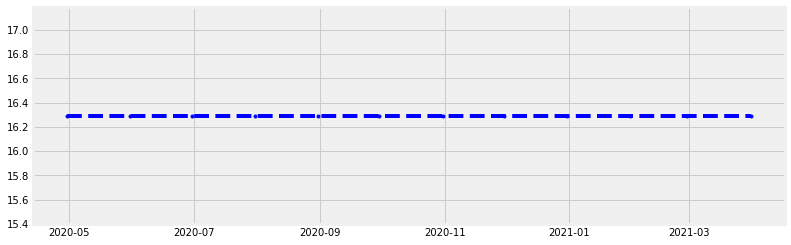

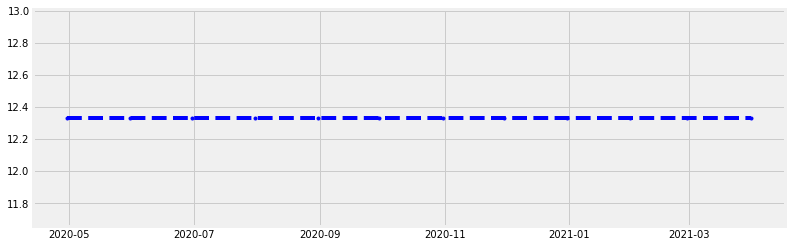

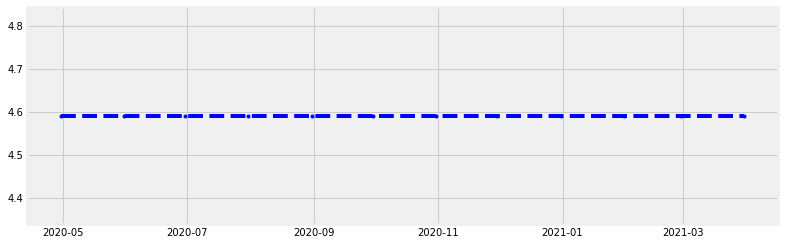

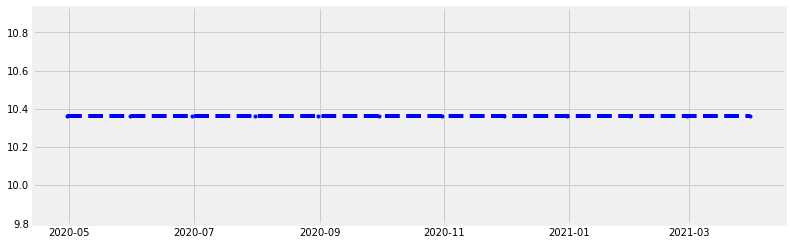

In [7]:
forecastout=skuorder.set_index('sku')
forecastouth=skuorder.set_index('sku')
forecastoutl=skuorder.set_index('sku')
dropsku=[]
count=0
for indsku in skuorder.index:
    sku=skuorder.loc[indsku, 'sku']
    pdsku=pd.DataFrame({'ds':datesinput,'y':skuorder.iloc[count,1:].values})
    print(skuorder.iloc[count,:].values)
    droplist=[]
    lunits=0
    for ind in pdsku.index:
        units=pdsku.loc[ind, 'y']
        if str(pdsku.loc[ind, 'y'])[0]=='n':
            lunits=0+lunits
            if lunits ==0:
                droplist.append(ind)
            else:
                pdsku.loc[ind, 'y']=0
        else:
            lunits=lunits+units
            pdsku.loc[ind, 'y']=np.round(float(units), decimals=2)
    pdsku=pdsku.drop(droplist)
    print(pdsku.iloc[-4:,1].values)
    if np.sum(pdsku.iloc[-4:,1].values)<5:
        dropsku.append(sku)
    else:
        meanunit=statistics.mean(pdsku.iloc[:,1].values)
    
        for ind in pdsku.index:
            units=pdsku.loc[ind, 'y']
        
            if units < float(meanunit*.2):
                pdsku.loc[ind, 'y']=np.nan
    
        pdsknew=pdsku['y'].interpolate(method='pad')
        mat=pdsknew.as_matrix()
        mat=mat.reshape(-1,1)
        transformer = StandardScaler()
        transformer.fit(mat)
        ystand = transformer.transform(mat)
        print(ystand)
        datelist=[]
        ylist=[]
        countmonths=0
        for ind in pdsku.index:
            date=pdsku.loc[ind, 'ds']
            rev=ystand[countmonths][0]
            datelist.append(date)
            ylist.append(float(rev))
            pdsku.loc[ind, 'y']=float(rev)
            countmonths=countmonths+1
        forecastin=pd.DataFrame({'ds':datelist, 'y':ylist})
        forecastin=forecastin.set_index('ds')
        ordervar, seasonalvar = arimamodel(forecastin)
        results = sm.tsa.statespace.SARIMAX(forecastin, order=ordervar,seasonal_order=seasonalvar, freq='M').fit()
        forecastdata=results.forecast(steps=12)
        forecastdata=forecastdata.reset_index()
    
        forecastdatainv = transformer.inverse_transform(forecastdata[0])
       
        plotforecast, axes = plt.subplots(1,1, figsize=(12,4))
        axes.plot_date(forecastdata['index'],forecastdatainv, '--.b' );
        ct=0
        for datefor in forecastdata.index:
            date=forecastdata.loc[datefor, 'index']
            sales=forecastdatainv[ct]
            salesl=sales*.9
            salesu=sales*1.1 
            ct=ct+1
            forecastout.loc[sku,date ]=sales
            forecastoutl.loc[sku,date ]=salesl
            forecastouth.loc[sku,date ]=salesu 
    count=count+1
forecastout=forecastout.drop(dropsku)

In [9]:
filenamefinal='/Users/JoyThompson/Desktop/scdammitdollskulevelforecast.xlsx'
writer = pd.ExcelWriter(filenamefinal, engine='xlsxwriter')
forecastout.to_excel(writer, sheet_name='forecast')
forecastoutl.to_excel(writer, sheet_name='forecast upper bound')
forecastoutl.to_excel(writer, sheet_name='forecast lower bound')
writer.save()